<div style="text-align: center; font-size:30px; font-weight: bold;">
    Travel Fraud Analyst at the New York City Taxi and Limousine Commission (NYC TLC)
</div>



<div style="text-align: center; font-size:20px; font-weight: bold;">
    MOH. KHISANUL FAKHRUDIN AKBAR (JCDS 0512)
</div>


---

# Background

New York City Taxi and Limousine Commission (NYC TLC) adalah lembaga pemerintah yang dibentuk pada tahun 1971 dengan tujuan untuk mengatur dan mengawasi layanan transportasi berlisensi yang bersifat komersial seperti taksi, limusin, kendaraan sewa, dan aplikasi ride-hailing (seperti Uber dan Lyft) di New York City. NYC TLC bertanggung jawab untuk memastikan keselamatan, keadilan, dan kepatuhan bagi pengguna dan penyedia jasa transportasi yang beroperasi sesuai dengan peraturan yang ketat. Untuk memastikan operasional taksi berjalan dengan baik serta memenuhi kebutuhan regulasi, New York City Taxi and Limousine Commission (NYC TLC) mengelola sistem pencatatan perjalanan taksi secara terstruktur. Setiap perjalanan yang dilakukan oleh taksi di NYC dicatat dalam database yang disebut NYC TLC Trip Record. 

Dalam industri transportasi berbasis taksi, kecurangan (fraud) dapat menyebabkan kerugian finansial yang signifikan bagi penyedia layanan dan pelanggan. Berdasarkan data perjalanan taksi NYC, kita akan melihat apakah ada indikasi bahwa beberapa perjalanan mungkin tidak valid atau menyimpang dari pola normal. Oleh karena itu, diperlukan analisis mendalam untuk mendeteksi kemungkinan adanya kecurangan.

## Problem statment

Dalam industri transportasi berbasis taksi, kecurangan (fraud) dapat menyebabkan kerugian finansial yang signifikan bagi penyedia layanan dan pelanggan. Berdasarkan data perjalanan taksi NYC, ada indikasi bahwa beberapa transaksi dan perjalanan mungkin tidak valid atau menyimpang dari pola normal. Oleh karena itu, diperlukan analisis mendalam untuk mendeteksi kemungkinan adanya kecurangan dalam sistem.

Permasalahan utama yang ingin diselesaikan:

1. Mendeteksi anomali
    * Anomali jarak perjalanan, apakah ada perjalanan dengan jarak yang tidak masuk akal?
    * Anomali durasi perjalanan, apakah ada perjalanan yang berlangsung terlalu lama untuk jarak pendek atau terlalu cepat untuk jarak jauh?
    * Anomali tarif perjanalan, apakah ada perjalanan yang kategori tarifnya tidak sesuai?
1. Anomali dalam pola pickup dan dropoff
    * Mengetahui daerah mana saja yang sering terjadinya anomali perjalanan
    * Mengetahui pada waktu-waktu tertentu yang sering terjadinya anomali perjalanan

Setelah berhasil mengetahui anomali perjalanan, daerah dan waktu yang frekuensi anomalinya tinggi kita sebagai data analyst di NYC TLC dapat memberikan rekomendasi atau solusi agar kedepanya tidak terjadi lagi dan menghindari kerugian diberbagai pihak.

# Data

Untuk menjawab pertanyaan diatas kita dapat menggunakan data set NYC TLC Trip record yang dapat di unduh [disini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N)

Dataset ini memuat berbagai informasi penting seperti waktu dan lokasi penjemputan serta pengantaran, jumlah penumpang, jarak perjalanan, tarif, metode pembayaran, serta status perjalanan. Ada 20 kolom pada dataset ini yaitu:
 * `VendorID` → Kode vendor penyedia data
 * `lpep_pickup_datetime` → Waktu penumpang naik (meter menyala).
 * `lpep_dropoff_datetime` → Waktu penumpang turun (meter mati).
 * `Passenger_count` → Jumlah penumpang.
 * `Trip_distance` → Jarak perjalanan dalam mil.
 * `PULocationID` → ID zona taksi tempat penumpang naik.
 * `DOLocationID` → ID zona taksi tempat penumpang turun.
 * `RateCodeID` → Kode tarif yang berlaku.
 * `Store_and_fwd_flag` → Indikator apakah data perjalanan disimpan di memori sebelum dikirim ke server.
 * `Payment_type` → Metode pembayaran
 * `Fare_amount` → Tarif berdasarkan waktu dan jarak.
 * `extra` → Biaya tambahan.
 * `MTA_tax` → Pajak MTA ($0.50).
 * `Improvement_surcharge` → Pajak tambahan per perjalanan ($0.30).
 * `Tip_amount` → Tips (hanya untuk pembayaran kartu kredit).
 * `Tolls_amount` → Total biaya tol dalam perjalanan.
 * `ehail_fee` → Total biaya aplikasi ehail.
 * `Total_amount` → Total biaya perjalanan (tidak termasuk tips tunai).
 * `Trip_type` → Kode jenis perjalanan.
 * `Congestion_surcharge` → adalah biaya tambahan untuk mengurangi kemacetan

## Data Understanding and Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning.

In [2]:
# import libary yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import levene, ttest_ind

Berikut 5 baris teratas dan terbawah dari dataset NYC TLC Trip Record:

In [3]:
df =  pd.read_csv("../data/NYC TLC Trip Record.csv", low_memory=False)
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [4]:
print(f"Dataset ini memiliki jumlah baris: {df.shape[0]}, dan jumlah kolom: {df.shape[1]}")
df.info()

Dataset ini memiliki jumlah baris: 68211, dan jumlah kolom: 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  floa

In [5]:
print("Jumlah baris kosong disetiap kolom:")
missing_value = df.isnull().sum()
# missing_value = missing_value[missing_value>0]
missing_value

Jumlah baris kosong disetiap kolom:


VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [6]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-07 23:58:06,2023-01-06 00:00:00,N
freq,4,6,63579


In [7]:
pd.reset_option('display.max_colwidth')
# pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtypes, df[col].isna().sum(), df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'type', 'null' , 'Number of Unique', 'Unique Sample'], data=listItem)
tabel1Desc

,Column Name,type,null,Number of Unique,Unique Sample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,4324,2,"[N, Y, nan]"
4,RatecodeID,float64,4324,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,4324,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


Insight:
* Dataset ini memiliki `20 kolom` dan jumlah baris sebanyak `68211 baris`.
* Dataset ini memiliki nilai kosong yang diwakili dengan nan dan tersebar pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type`, `congestion_surcharge`.
* Pada kolom `ehail_fee` berisi data kosong sehingga memuat data nan sebanyak 68211 baris.
* Pada kolom `RatecodeID` normalnya berisi data dalam rentang 1-6, namun ada data yang memiliki nilai 99 (diluar kategori).
* Pada `lpep_pickup_datetime` dan `lpep_dropoff_datetime` seharusnya memiliki tipe data datetime bukan string.
* Dataset ini menggunakan kode lokasi (Location ID) untuk mendefinisikan tempat, kita bisa tambahkan kolom baru berisi lokasi asli berdasarkan Location ID yang berasal dari luar Dataset utama (opsional)

### Missing Value

In [8]:
# persentase missing value di tiap kolom
missing_value = missing_value[missing_value>0]
display(missing_value.to_frame(name="Jumlah baris kosong"), (missing_value/df.shape[0]*100).to_frame(name="Persentase"))

,Jumlah baris kosong
store_and_fwd_flag,4324
RatecodeID,4324
passenger_count,4324
ehail_fee,68211
payment_type,4324
trip_type,4334
congestion_surcharge,4324


,Persentase
store_and_fwd_flag,6.339154
RatecodeID,6.339154
passenger_count,6.339154
ehail_fee,100.000000
payment_type,6.339154
trip_type,6.353814
congestion_surcharge,6.339154


Secara garis besar dari kedua tabel diatas dapat disimpulkan bahwa kebanyakan data kosong memiliki jumlah baris dan persentase yang sama yaitu sekitar 6.3%, kecuali kolom `ehail_fee` yang sepenuhnya memiliki data kosong

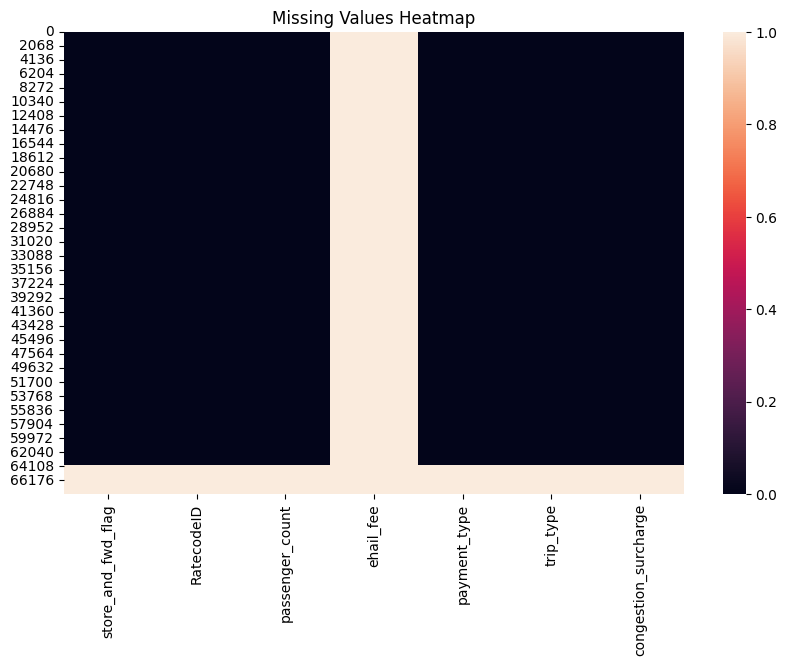

In [9]:
plt.figure(figsize=(10, 6))  # Ukuran grafik lebih proporsional
sns.heatmap(df[missing_value.index].isna())

plt.title("Missing Values Heatmap")
plt.show()

Insight:
* `ehail_fee` adalah biaya tambahan yang dikenakan untuk perjalanan yang dipesan melalui layanan e-hailing (misalnya Uber, Lyft, atau aplikasi pemesanan taksi lainnya)
* Pada kolom `ehail_fee` 100% data berisi null sehingga seluruh grafiknya putih. Dataset ini mencakup perjalanan taksi biasa (bukan e-hailing) oleh karena itu kolom `ehail_fee` memang sengaja kosong sehingga dapat dikatakan **Missing Not at Random (MNAR)**
* kolom `store_and_fwd_flag` memuat informasi status apakah taksi menyimpan data perjalanan sebelum mengirimnya ke server, jika data ini kosong berarti terdapat kesalahan dalam proses pencatatan atau pengolahan data, akibatnya informasi tertentu (misalnya `RatecodeID`, `passenger_count`, `payment_type`) bisa hilang dan tidak tercatat di database.
* Jika kita lihat pada visualisasi persebaran nilai kosong dapat diketahui bahwa data yang kosong pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge` memiliki posisi yang sama atau pada baris yang sama. kita bisa berasumsi bahwa jenis missing value pada dataset ini adalah **MAR (Missing at Random)** karena nilai yang hilang dikarena kesalahan teknis dan data hilang bukan secara acak, tetapi karena faktor tertentu yaitu data pada kolom `store_and_fwd_flag` yang hilang.

In [10]:
df[df["store_and_fwd_flag"].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,NaN,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,NaN,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,NaN,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,NaN,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,NaN,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


#### Solution 

`ehail_fee` adalah biaya tambahan yang dikenakan untuk perjalanan yang dipesan melalui layanan e-hailing (misalnya Uber, Lyft, atau aplikasi pemesanan taksi lainnya). Pada kolom `ehail_fee` 100% data berisi null yang berarti dalam dataset ini tidak ada yang menggunakan layanan e-hailing, dikarenakan kolom berisi data kosong maka sebaiknya kita drop saja.

In [11]:
# Hapus kolon ehail_fee
df.drop(columns="ehail_fee", inplace=True)

Seperti yang sudah dijelaskan diatas bahwa nilai kosong pada `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge` disebabkan oleh kesalahan dalam proses pencatatan atau pengolahan data pada `store_and_fwd_flag` sehingga nilai kosongnya tepat pada baris yang sama dan memiliki persentase nilai kosong sebesar 6.3%, maka kita bisa hapus baris tersebut.

In [12]:
# Hapus baris yang memiliki posisi kosong yang sama
df = df.drop(df[df["store_and_fwd_flag"].isnull()].index)

Setelah kita menangani missing value selanjutnya kita cek lagi apakah masih ada missing valuenya

In [13]:
# cek lagi nilai kosong
df.isnull().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                10
congestion_surcharge      0
dtype: int64

In [14]:
df[df["trip_type"].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0


In [15]:
# Mengecek nilai 'trip_type' untuk baris yang memiliki RatecodeID = 99
trip_type_for_99 = df[df["trip_type"].isnull()][["RatecodeID", "trip_type"]]
trip_type_for_99

,RatecodeID,trip_type
1084,99.0,NaN
2174,99.0,NaN
9055,99.0,NaN
14125,99.0,NaN
29143,99.0,NaN
29711,99.0,NaN
35975,99.0,NaN
37691,99.0,NaN
42432,99.0,NaN
45204,99.0,NaN


Dapat diketahu masih ada 10 baris pada kolom `trip_type` yang memiliki nilai kosong, pada baris tersebut bersamaan memiliki nilai 99 pada `RatecodeID` yang merupakan anomali juga

Dalam aturan resmi NYC Taxi & Limousine Commission (TLC), RatecodeID hanya memiliki 6 nilai valid:
1. Standard Rate
1. JFK Airport
1. Newark Airport
1. Nassau or Westchester
1. Negotiated Fare
1. Group Ride

* Namun, pada baris ini ada 10 perjalanan dengan `RatecodeID` = 99 yang tidak termasuk dalam kategori resmi, dan memiliki `trip_type` = Nan. Artinya, data ini kemungkinan berasal dari kesalahan input.
* Kombinasi `RatecodeID` = 99 dan `trip_type` = NaN menunjukkan bahwa baris ini adalah data error atau tidak valid, dikarenakan jumlah anomali ini hanya 10 baris (0.01% dari 68,211) lebih baik kita hapus saja.

In [16]:
df = df.drop(df[df["trip_type"].isnull()].index)
df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

### Casting

Setelah kita menangani missing value selanjutnya kita menangani kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` yang seharusnya memiliki tipe data berupa datetime namum pada dataset memiliki tipe string/object

In [17]:
# Ubah tipe data kolom menjadi datetime
df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"])
df["lpep_dropoff_datetime"] = pd.to_datetime(df["lpep_dropoff_datetime"])

In [18]:
pd.reset_option('display.max_colwidth')
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtypes, df[col].isna().sum(), df[col].nunique(), df[col].unique()])

NewDesc = pd.DataFrame(columns=['Column Name', 'type','null', 'Number of Unique', 'Unique Sample'], data=listItem)
NewDesc

,Column Name,type,null,Number of Unique,Unique Sample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,62665,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,datetime64[ns],0,62602,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,0,2,"[N, Y]"
4,RatecodeID,float64,0,5,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,int64,0,222,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0,248,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0,1727,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0,463,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


### Add Aditional Data

Sebagai pelengkap mari kita tambahkan kolom `Borough` dan `Zone` berdasarkan LocationID agar mudah dibaca. data tambahan ini bersumber dari luar dataset yang dapat diunduh [disini](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

In [19]:
df_zone =  pd.read_csv("../data/taxi-zone-lookup.csv")
df_zone.head()

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


Menambahkan Lokasi Penumpang Naik

In [20]:
df = df.merge(df_zone, left_on="PULocationID", right_on="LocationID", how="left")
df = df.drop(columns="LocationID")
df.rename(columns={"Borough": "Pickup Borough", "Zone":"Pickup Zone"},inplace=True)

Menambahkan Lokasi Penumpang Turun

In [21]:
df = df.merge(df_zone, left_on="DOLocationID", right_on="LocationID", how="left")
df = df.drop(columns="LocationID")
df.rename(columns={"Borough": "Drop Borough", "Zone":"Drop Zone"},inplace=True)

Setelah data bersih dan ditambahkan keterangan lokasi naik dan turun penumpang, kita akan menambahkan durasi perjalanan:

In [22]:
df["Trip Duration"] = df["lpep_dropoff_datetime"]-df["lpep_pickup_datetime"]

In [23]:
# Ekstraksi informasi waktu
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()

In [24]:
df["Trip Duration (seconds)"] = df["Trip Duration"].dt.total_seconds()

### Cleaned Data

Sebelum dibersihkan, kita memiliki 68211 baris dan 20 kolom, sekarang kita memiliki **63877 baris**, Sekitar 4334 (6.3%) baris data yang kosong dihapus dan **22 kolom** setelah ada penambahan kolom baru untuk memuat lokasi yaitu `Drop Borough`,`Drop Zone`, `Pickup Borough`, `Pickup Zone` dan Durasi perjalanan `Trip Duration`. <br>
sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan:

In [25]:
pd.reset_option('display.max_colwidth')
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtypes, df[col].isna().sum(), df[col].nunique(), df[col].unique()])

NewDesc = pd.DataFrame(columns=['Column Name', 'type','null', 'Number of Unique', 'Unique Sample'], data=listItem)
NewDesc

,Column Name,type,null,Number of Unique,Unique Sample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,62665,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,datetime64[ns],0,62602,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,0,2,"[N, Y]"
4,RatecodeID,float64,0,5,"[1.0, 5.0, 4.0, 3.0, 2.0]"
5,PULocationID,int64,0,222,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0,248,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0,1727,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0,463,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


In [26]:
display(df.describe(), df.describe(include='object'))

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Trip Duration,hour,Trip Duration (seconds)
count,63877.000000,63877,63877,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,...,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877.000000,63877,63877.000000,63877.000000
mean,1.855895,2023-01-16 20:29:28.932651776,2023-01-16 20:47:27.346791168,1.101836,97.730200,138.308797,1.315920,2.576974,16.074491,0.880473,...,2.041507,0.144182,0.949187,21.200955,1.373671,1.021933,0.726862,0 days 00:17:58.414139674,13.906555,1078.414140
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,...,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000,0 days 00:00:00,0.000000,0.000000
25%,2.000000,2023-01-09 12:15:18,2023-01-09 12:33:17,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,...,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000,0 days 00:07:05,10.000000,425.000000
50%,2.000000,2023-01-17 08:44:46,2023-01-17 08:59:19,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,...,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000,0 days 00:11:06,15.000000,666.000000
75%,2.000000,2023-01-24 16:18:41,2023-01-24 16:36:36,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,...,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000,0 days 00:16:53,18.000000,1013.000000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,...,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000,0 days 23:59:53,23.000000,86393.000000
std,0.351199,NaN,NaN,0.620487,60.173501,76.883640,0.979123,6.760261,13.277144,1.292861,...,2.998734,1.012740,0.201782,15.131310,0.508058,0.146465,1.212897,0 days 01:17:18.107581368,5.199829,4638.107581


,store_and_fwd_flag,Pickup Borough,Pickup Zone,Drop Borough,Drop Zone,day_of_week
count,63877,63877,63877,63877,63877,63877
unique,2,7,220,7,246,7
top,N,Manhattan,East Harlem North,Manhattan,East Harlem South,Tuesday
freq,63569,37474,12954,37373,3415,10604


# Data Analyst

Sebelumnya kita sudah melakukan Data Cleanising dan telah mendapatkan data yang sudah bersih. Sekarang, kita akan menganalisis data tersebut untuk menjawab pokok permasalahan yaitu **mendeteksi perjalanan yang masuk dalam kategori anomali** dan **mengetahui daerah mana saja yang sering terjadi perjalanan anomali tersebut dan waktu-waktu yang sering terjadinya**. Namun, untuk menjawab pertanyaan tersebut pertama-tama kita harus mengetahui daerah mana saja yang menjadi lokasi paling padat untuk permintaan taxi.

## Top Demand Zone

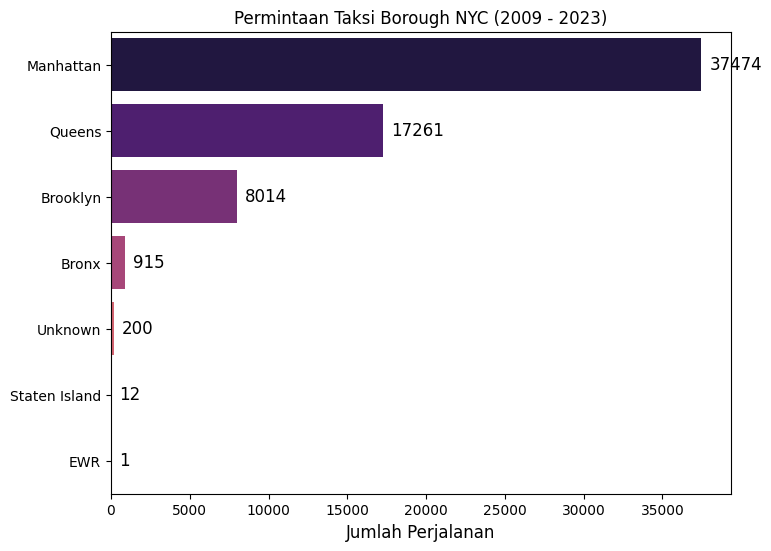

In [28]:
# Menghitung jumlah perjalanan per Borough
top_pickup_Borough = df["Pickup Borough"].value_counts()

# Membuat visualisasi
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_pickup_Borough.values, y=top_pickup_Borough.index, hue=top_pickup_Borough.index, palette="magma", legend=False)

# Menambahkan label nilai di atas setiap batang
for index, value in enumerate(top_pickup_Borough.values):
    plt.text(value + 500, index, str(value), color="black", va="center", fontsize=12)

# Menambahkan judul dan label
plt.title("Permintaan Taksi Borough NYC (2009 - 2023)", fontsize=12)
plt.xlabel("Jumlah Perjalanan", fontsize=12)
plt.ylabel("")

# Menampilkan plot
plt.show()

**Borough** adalah divisi administratif utama di New York City. Kota ini dibagi menjadi 5 borough utama, yaitu:
1. Manhattan
1. Brooklyn
1. Queens
1. The Bronx
1. Staten Island

Dari bar chart diatas dapat diketahui bahwa Borough yang memiliki permintaan paling tinggi dari tahun 2009 sampai 2023 adalah Manhattan, yang memiliki jumlah permintaan taxi sebanyak 37474, nilai ini setara dengan 58% dari total data perjalanan di dataset ini (63877). Kemudian disusul oleh Queens sebanyak 17261 (27%), Brooklyn 8014 (12%), dan permintaan yang paling rendah terdapat pada Bandara Newark Liberty International (EWR) di New Jersey sebanyak 1 permintaan. Walaupun EWR secara administratif ada di New Jersey, NYC masih menganggapnya sebagai bagian dari sistem transportasi metropolitan mereka karena banyak orang di Manhattan dan Brooklyn lebih memilih terbang dari EWR karena lebih dekat daripada JFK.

In [29]:
top_pickup_zones = df["Pickup Zone"].value_counts()

df_top_zones = (top_pickup_zones.head(5) # <--- ubah jumlah zone yg ingin ditampilkan disini
                .to_frame(name="count")
                .assign(persentase=lambda x: (x["count"] / df.shape[0]) * 100)
                .reset_index())

df_top_zones = df_top_zones.merge(
    df[["Pickup Zone", "Pickup Borough"]].drop_duplicates(),
    on="Pickup Zone", how="left"
)

df_top_zones


,Pickup Zone,count,persentase,Pickup Borough
0,East Harlem North,12954,20.279600,Manhattan
1,East Harlem South,8847,13.850056,Manhattan
2,Forest Hills,3814,5.970850,Queens
3,Central Harlem,3742,5.858134,Manhattan
4,Morningside Heights,3599,5.634266,Manhattan


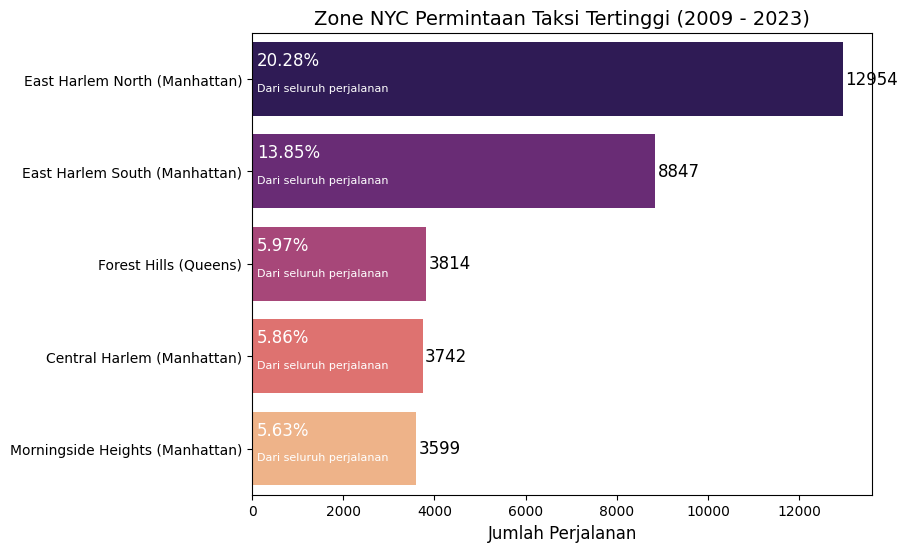

In [30]:
df_top_zones["Zone (Borough)"] = df_top_zones["Pickup Zone"].astype(str) + " (" + df_top_zones["Pickup Borough"] + ")"

# Membuat visualisasi
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df_top_zones["count"], y=df_top_zones["Zone (Borough)"], hue=df_top_zones["Zone (Borough)"], palette="magma", legend=False)

# Menambahkan label perjalanan
for index, value in enumerate(df_top_zones["count"]):
    plt.text(value + 50, index, str(value), color="black", va="center", fontsize=12)

# Menambahkan label persentase
for index, value in enumerate(df_top_zones["persentase"]):
    plt.text(100, index-0.2, f"{value:.2f}%", color="white", va="center", fontsize=12)

# Menambahkan label persentase
for index, value in enumerate(df_top_zones["persentase"]):
    plt.text(100, index+0.1, "Dari seluruh perjalanan", color="white", va="center", fontsize=8)


# Menambahkan judul dan label
plt.title("Zone NYC Permintaan Taksi Tertinggi (2009 - 2023)", fontsize=14)
plt.xlabel("Jumlah Perjalanan", fontsize=12)
plt.ylabel("")

# Menampilkan plot
plt.show()

Setelah kita mengetahui perbandingan permintaan taxi berdasarkan Borough kita akan memperkecil lagi wilayahnya, yaitu permintaan taxi berdasarkan Zone. Zone adalah wilayah administratif yang levelnya dibawah Borough. Berdasarkan grafik diatas dapat kita lihat bahwa zone yang paling tinggi permintaan taxi di New York City pada tahun 2009-2003 adalah East Harlem North yang memiliki jumlah perjalanan sebesar 12,954 dan memiliki porsi 20.28% dari 100% permintaan taxi di New York City. Dari sini dapat kita simpulkan juga bahwa zone yang paling tinggi permintaanya kebanyakan berada pada Manhattan dan terdapat satu zone pada posisi 3 yang berada pada Queens yaitu Forest Hills.

## Travel Distance Anomaly

Pada Travel Distance anomaly kita akan mendeteksi apakah ada perjalanan yang jaraknya nol, yang berarti kendaraan tidak bergerak namun tarifnya ada atau dikenakan

In [31]:
distance_anomaly = df[(df["trip_distance"] == 0) & (df["total_amount"] > 0)]

print("Travel Distance Anomaly Count :",distance_anomaly.shape[0], f"({distance_anomaly.shape[0]/df.shape[0]:.2%})")
distance_anomaly.head()

Travel Distance Anomaly Count : 3068 (4.80%)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,Pickup Borough,Pickup Zone,Drop Borough,Drop Zone,Trip Duration,hour,day_of_week,Trip Duration (seconds)
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.0,7.2,...,1.0,0.0,Queens,Steinway,Queens,Old Astoria,0 days 00:06:20,0,Sunday,380.0
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,1.0,75,75,1.0,0.0,4.4,...,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem South,0 days 00:03:00,0,Sunday,180.0
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,0.0,0.0,20.0,...,2.0,0.0,Bronx,Mott Haven/Port Morris,Bronx,Mott Haven/Port Morris,0 days 00:00:07,1,Sunday,7.0
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,1.0,7,7,1.0,0.0,3.0,...,1.0,0.0,Queens,Astoria,Queens,Astoria,0 days 00:00:23,1,Sunday,23.0
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1.0,0.0,3.0,...,1.0,0.0,Unknown,Unknown,Unknown,Unknown,0 days 00:00:02,1,Sunday,2.0


In [32]:
df["Distance Anomaly"] = False
df.loc[distance_anomaly.index, "Distance Anomaly"] = True 

Perjalanan dengan jarak nol: Ditemukan **3068 perjalanan** yang mencatatkan jarak 0 mil atau sekitar **4.80%** dari total perjalanan, meskipun terdapat durasi perjalanan. Ini bisa menunjukkan:
* Kesalahan pencatatan pada perangkat GPS.
* Beberapa pengemudi mungkin mencoba memanipulasi sistem dengan mencatat perjalanan palsu untuk meningkatkan jumlah perjalanan atau pendapatan.
* Pengemudi mungkin memulai dan mengakhiri perjalanan tanpa benar-benar membawa penumpang. 
* Sistem mungkin mencatat perjalanan walaupun hanya berupa kesalahan teknis (misalnya perjalanan dicatat secara otomatis tanpa benar-benar terjadi). <br>

oleh karena itu pada perjalanan tersebut kita akan menandainya sebagai anomali perjalanan.

## Travel Time Anomaly

Pada Travel Time Anomaly kita akan mendeteksi perjalanan dengan kriteria:
* Perjalanan terlalu cepat untuk jarak jauh (< 10 detik untuk jarak > 5 mil) 
* Perjalanan terlalu lambat untuk jarak pendek (> 1 jam untuk jarak < 0.5 mil)

Alasan:
* Menempuh jarak lebih dari 5 mil (sekitar 8 km) dalam waktu kurang dari 10 detik memerlukan kecepatan yang sangat tidak realistis (setara lebih dari 1.800 mph / 2.900 km/h — hampir secepat pesawat jet!)
* Jarak kurang dari 0.5 mil (sekitar 800 meter) biasanya bisa ditempuh dalam waktu 5-15 menit bahkan dengan kemacetan berat normalnya tidak lebih dari 1 jam.


In [33]:
# Deteksi anomali durasi perjalanan
time_anomaly =   df[((df['trip_distance'] > 5) & (df['Trip Duration (seconds)'] < 10)) |
                    ((df['trip_distance'] < 0.5) & (df['Trip Duration (seconds)'] > 3600))]

# Tampilkan hasil
print("Time Travel Anomaly Count :",time_anomaly.shape[0], f"({time_anomaly.shape[0]/df.shape[0]:.2%})")
time_anomaly.head()

Time Travel Anomaly Count : 125 (0.20%)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,Pickup Borough,Pickup Zone,Drop Borough,Drop Zone,Trip Duration,hour,day_of_week,Trip Duration (seconds),Distance Anomaly
35,1,2023-01-01 00:41:53,2023-01-01 00:41:58,N,1.0,83,83,1.0,6.7,3.0,...,0.0,Queens,Elmhurst/Maspeth,Queens,Elmhurst/Maspeth,0 days 00:00:05,0,Sunday,5.0,False
1141,2,2023-01-01 20:28:01,2023-01-02 00:00:00,N,1.0,83,226,1.0,0.0,17.0,...,0.0,Queens,Elmhurst/Maspeth,Queens,Sunnyside,0 days 03:31:59,20,Sunday,12719.0,True
1180,1,2023-01-01 21:14:27,2023-01-01 22:24:48,N,1.0,48,89,1.0,0.0,31.2,...,0.0,Manhattan,Clinton East,Brooklyn,Flatbush/Ditmas Park,0 days 01:10:21,21,Sunday,4221.0,True
1315,2,2023-01-02 02:16:16,2023-01-03 00:00:00,N,5.0,92,92,1.0,0.0,18.0,...,0.0,Queens,Flushing,Queens,Flushing,0 days 21:43:44,2,Monday,78224.0,True
1910,2,2023-01-02 14:33:05,2023-01-02 15:34:00,N,1.0,76,89,1.0,0.0,32.5,...,0.0,Brooklyn,East New York,Brooklyn,Flatbush/Ditmas Park,0 days 01:00:55,14,Monday,3655.0,True


In [34]:
df["Time Travel Anomaly"] = False
df.loc[time_anomaly.index, "Time Travel Anomaly"] = True 

Dari hasil diatas dapat diketahui sebanyak 125 perjalanan atau sekitar 0.20% dari total perjalanan, terindikasi time travel anomaly, hal ini dapat menunjukan:
* Kesalahan pencatatan waktu.
* Penipuan sistem untuk memanipulasi catatan perjalanan.
* Lupa mengakhiri perjalanan di aplikasi taksi, sehingga meter taxi terus berjalan
* Beberapa pengemudi bisa saja memanipulasi data perjalanan agar terlihat lebih pendek atau lebih cepat untuk menghindari inspeksi atau untuk keuntungan tertentu.
* Pengemudi dapat dengan sengaja memperpanjang durasi untuk meningkatkan tarif berbasis waktu.

oleh karena itu pada perjalanan tersebut kita akan menandainya sebagai time travel anomaly.

## Travel Rate Anomaly

Ratecode NYC TLC (New York City Taxi & Limousine Commission) adalah sistem kode tarif yang digunakan untuk menentukan jenis tarif yang berlaku dalam perjalanan taksi di New York City. Kode ini membantu dalam menghitung biaya perjalanan berdasarkan zona, jarak, atau ketentuan khusus lainnya.

Berikut adalah daftar kode tarif (Rate Code) yang digunakan oleh taksi di NYC:

|Rate Code	|Deskripsi|
|-|-|
|1 – Standard Rate	|Tarif standar dalam batas kota NYC (5 boroughs).|
|2 – JFK	|Tarif tetap dari/ke Bandara JFK dan Manhattan.|
|3 – Newark	|Perjalanan dari/ke Bandara Newark (EWR).|
|4 – Nassau/Westchester|	Perjalanan keluar dari NYC ke wilayah Nassau atau Westchester.|
|5 – Negotiated Fare	|Tarif yang telah disepakati sebelumnya, biasanya untuk perjalanan tertentu atau layanan khusus.|
|6 – Group Ride	|Tarif khusus untuk layanan berbagi (group ride) pada rute tertentu.|

In [35]:
df["Travel Rate Anomaly"] = False

**Ratecode 1 – Standard Rate**
* Ratecode 1 adalah tarif reguler untuk perjalanan dalam 5 borough NYC.
* Anomali terjadi jika perjalanan menggunakan Ratecode 1 tetapi keluar dari NYC (seharusnya Ratecode 4).
* 3$ adalah tarif awal standar untuk Rate Code 1 ketika argo dimulai, jika ada biaya perjalan <3$ maka mencurigakan 

In [36]:
nyc_boroughs = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]
wrong_borough_rate1 = df[(df["RatecodeID"] == 1) & 
                        ~(df["Drop Borough"].isin(nyc_boroughs)) & 
                        ~(df["Pickup Borough"].isin(nyc_boroughs))]

print("wrong_borough_rate1 :", wrong_borough_rate1.shape[0],
        "\nBorough :",wrong_borough_rate1["Pickup Borough"].unique(), wrong_borough_rate1["Drop Borough"].unique())

wrong_borough_rate1 : 84 
Borough : ['Unknown'] ['Unknown']


Ratecode 1 adalah tarif reguler untuk perjalanan dalam 5 borough NYC. Jika ada perlajanan yang menggunakan Ratecode1, namun pickup dan drop boroughnya berada diluar wilayah NYC, maka perjalanan tersebut mencurigakan. Namun, pada hasil temuan ini pickup dan drop boroughnya berada pada wilayah *Unknown*. Pada database [NYC TLC Taxi Zone](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) LocationID = 264 memang tercatat sebagai wilayah yang tidak dikenal. Data mentah yang diambil dari perangkat GPS atau sistem penagihan kadang mengalami kesalahan pencatatan, sehingga zona tertentu bisa tampil sebagai *Unknown* meskipun sebenarnya adalah area yang valid. Oleh karena itu, kita tidak akan menandainya sebagai perjalanan yang mencurigakan, karena kita tidak tahu tepat lokasinya.

In [37]:
low_fare_per_mile_rate1 = df[(df["RatecodeID"] == 1) & (df["total_amount"] < 3)]

print("Wrong low_fare_per_mile_rate1 Fare:", low_fare_per_mile_rate1.shape[0])
df.loc[low_fare_per_mile_rate1.index, "Travel Rate Anomaly"] = True 

Wrong low_fare_per_mile_rate1 Fare: 222


222 perjalanan memiliki total tarif terlalu rendah <3$
* 3$ adalah tarif awal standar untuk Rate Code 1 ketika argo dimulai, jika ada biaya perjalan <3$ maka mencurigakan 
* Mungkin ada kesalahan dalam pengisian tarif atau perjalanan dilakukan dengan diskon besar.

**Ratecode 2 – JFK Flat Fare**
* Tarif tetap (flat rate) berlaku hanya untuk perjalanan antara Manhattan dan JFK.
* Jika perjalanan tidak dari/ke JFK tetapi menggunakan Ratecode 2, ini mencurigakan.

In [38]:
wrong_jfk_fare = df[(df["RatecodeID"] == 2) & 
                    (~df["Pickup Zone"].str.contains("JFK", na=False)) & 
                    (~df["Drop Zone"].str.contains("JFK", na=False))]

print("Wrong JFK Fare:", wrong_jfk_fare.shape[0])
df.loc[wrong_jfk_fare.index, "Travel Rate Anomaly"] = True 

Wrong JFK Fare: 56


56 perjalanan menggunakan tarif tetap JFK tetapi tidak berasal atau menuju JFK.
* Seharusnya tarif ini hanya berlaku untuk perjalanan Manhattan <-> JFK.
* Ini bisa mengindikasikan upaya pengemudi untuk mengklaim tarif tetap tanpa rute yang sesuai.

**Ratecode 3 – Newark Airport Fare**
* Tarif khusus berlaku hanya untuk perjalanan dari/ke Bandara Newark.
* Jika perjalanan tidak dari/ke Newark tetapi menggunakan Ratecode 3, ini mencurigakan.

In [39]:
wrong_newark_fare = df[(df["RatecodeID"] == 3) & 
                        (~df["Pickup Zone"].str.contains("Newark", na=False)) & 
                        (~df["Drop Zone"].str.contains("Newark", na=False))]

print("Wrong Newark Fare :" ,wrong_newark_fare.shape[0])
df.loc[wrong_newark_fare.index, "Travel Rate Anomaly"] = True 

Wrong Newark Fare : 23


23 perjalanan menggunakan tarif Newark tetapi tidak berasal atau menuju Newark.
* Bisa jadi pengemudi menerapkan tarif ini secara tidak sah.
* Ini menunjukkan kemungkinan kesalahan input atau manipulasi tarif.

**Ratecode 4 – Nassau/Westchester**
* Tarif ini hanya berlaku jika perjalanan keluar dari NYC (Manhattan, Brooklyn, Queens, Bronx, Staten Island).
* Jika perjalanan masih dalam NYC tetapi menggunakan Ratecode 4, ini mencurigakan.

In [40]:
wrong_nassau_westchester_fare = df[(df["RatecodeID"] == 4) & (df["Drop Borough"].isin(nyc_boroughs))]

print("Wrong Nassau/Westchester Fare :", wrong_nassau_westchester_fare.shape[0])
df.loc[wrong_nassau_westchester_fare.index, "Travel Rate Anomaly"] = True 

Wrong Nassau/Westchester Fare : 3


3 perjalanan menggunakan tarif Nassau/Westchester tetapi masih dalam NYC.
* Ini bisa menunjukkan kesalahan input atau upaya pengemudi menaikkan tarif secara tidak sah.

**Ratecode 5 – Negotiated Fare** 
* Harus ada kesepakatan tarif sebelum perjalanan dimulai.
* Tarif ini tidak mengikuti tarif meter standar.
* Penumpang disarankan untuk memastikan tarif yang disepakati sudah jelas untuk menghindari

dikarenakan tidak ada data tentang kesepakatan antara penumpang dan pengemudi pada dataset ini maka kita asumsikan, **Jika tarif terlalu rendah (< $1) tergolong mencurigakan**.

In [41]:
wrong_negotiated_fare = df[(df["RatecodeID"] == 5) & (df["fare_amount"] < 1)]

print("Wrong Negotiated Fare :", wrong_negotiated_fare.shape[0])
df.loc[wrong_negotiated_fare.index, "Travel Rate Anomaly"] = True 

Wrong Negotiated Fare : 39


39 perjalanan memiliki tarif terlalu rendah (< $1).
* Bisa jadi ada negosiasi tidak wajar atau manipulasi tarif.
* Ini bisa menunjukkan upaya pengemudi untuk menghindari pelaporan tarif penuh.

**Ratecode 6 – Group Ride**
* Digunakan ketika penumpang berbagi taksi dengan orang lain yang memiliki tujuan yang sama atau searah.
* Layanan berbagi taksi di titik tertentu, misalnya dari pusat transportasi utama ke area populer.
* Tarif bisa lebih murah karena biaya dibagi di antara penumpang, Jika ada hanya 1 penumpang, maka mencurigakan.

In [42]:
wrong_group_ride = df[(df["RatecodeID"] == 6) & (df["passenger_count"] == 1)]

print("Wrong Group Ride :", wrong_group_ride.shape[0])

Wrong Group Ride : 0


Tidak ditemukan anomali dalam perjalanan grup (Ratecode 6).
* Semua perjalanan berbagi memiliki lebih dari satu penumpang.
* Ini menunjukkan sistem tarif berjalan dengan benar untuk Ratecode 6.

## Top Anomaly Location

Setelah kita mengetahui perjalanan mana saja yang mencurigakan (anomaly) dan kemungkinan sebagai fraud, kita akan mencari lokasi yang frekuensi perjalanan mencurigakannya tinggi. Namun, sebelum itu kita akan membuat tanda perjalanan anomali terlebih dahulu dari ketiga anomali (Travel distance, Travel time, Travel rate) di setiap perjalanan dengan kolom baru yaitu `Anomaly Travel`.

In [43]:
df["Anomaly Travel"] = df[["Distance Anomaly", "Time Travel Anomaly", "Travel Rate Anomaly"]].any(axis=1).astype(int)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Drop Borough,Drop Zone,Trip Duration,hour,day_of_week,Trip Duration (seconds),Distance Anomaly,Time Travel Anomaly,Travel Rate Anomaly,Anomaly Travel
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,Manhattan,Lincoln Square West,0 days 00:11:01,0,Sunday,661.0,False,False,False,0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,Manhattan,Central Park,0 days 00:06:46,0,Sunday,406.0,False,False,False,0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,Queens,Old Astoria,0 days 00:06:20,0,Sunday,380.0,True,False,False,1
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,Manhattan,Upper West Side North,0 days 00:05:49,0,Sunday,349.0,False,False,False,0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,Manhattan,East Harlem North,0 days 00:05:58,0,Sunday,358.0,False,False,False,0


In [44]:
anomaly_borough = df.groupby("Pickup Borough")["Anomaly Travel"].sum().sort_values(ascending=False)
anomaly_borough

Pickup Borough
Queens           1317
Brooklyn          827
Manhattan         757
Bronx             341
Unknown           147
Staten Island       4
EWR                 1
Name: Anomaly Travel, dtype: int64

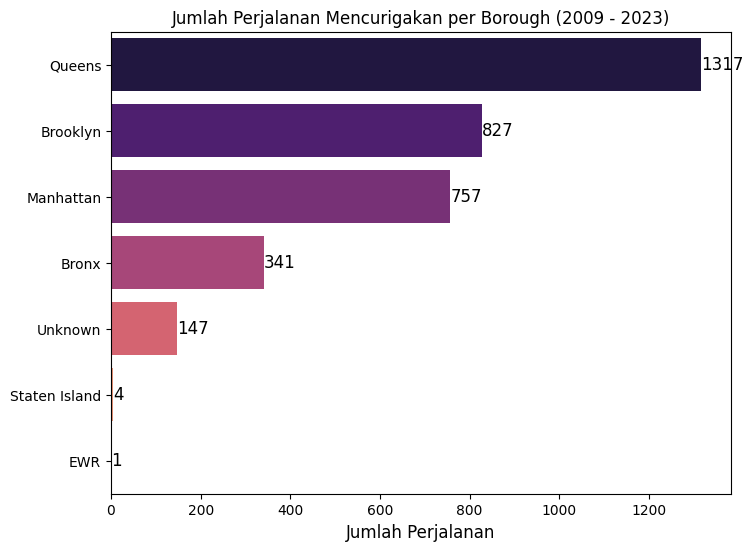

In [45]:
# Membuat visualisasi
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=anomaly_borough.values, y=anomaly_borough.index, hue=anomaly_borough.index, palette="magma", legend=False)

# Menambahkan label nilai di atas setiap batang
for index, value in enumerate(anomaly_borough.values):
    plt.text(value, index, str(value), color="black", va="center", fontsize=12)

# Menambahkan judul dan label
plt.title("Jumlah Perjalanan Mencurigakan per Borough (2009 - 2023)", fontsize=12)
plt.xlabel("Jumlah Perjalanan", fontsize=12)
plt.ylabel("")

# Menampilkan plot
plt.show()

Dari grafik tersebut, berikut adalah beberapa insight yang dapat diambil terkait jumlah perjalanan mencurigakan per borough dalam rentang waktu 2009 - 2023:

**1. Queens Menjadi Pusat Perjalanan Mencurigakan**
* Dengan 1.317 kasus, Queens memiliki jumlah perjalanan mencurigakan tertinggi, jauh melampaui borough lain.
* Kemungkinan penyebabnya bisa mencakup:
    - Dekat dengan JFK Airport dan LaGuardia Airport, yang berpotensi meningkatkan risiko aktivitas penipuan atau perjalanan yang tidak jelas.
    - Queens memiliki area industri, komersial, dan perumahan yang luas, sehingga aktivitas perjalanan lebih beragam. 

**2. Brooklyn dan Manhattan Juga Menonjol**
* Brooklyn (827) dan Manhattan (757) menempati posisi kedua dan ketiga.
* Hal ini bisa dipengaruhi oleh:
    - Kepadatan penduduk tinggi yang menyebabkan lebih banyak perjalanan taksi.
    - Banyaknya pusat bisnis, hiburan, dan pariwisata yang berpotensi meningkatkan aktivitas transportasi yang tidak wajar.

**3. Bronx Menempati Posisi Tengah**
* Dengan 341 perjalanan mencurigakan, Bronx menunjukkan aktivitas yang lebih rendah dibandingkan Queens, Brooklyn, dan Manhattan.
* Faktor ini bisa disebabkan oleh:
    - Aktivitas komersial yang tidak sebesar Manhattan atau Brooklyn.
    - Bronx cenderung lebih berfokus pada area perumahan dengan lebih sedikit titik wisata utama.

**4. Zona "Unknown" Relatif Tinggi**
* Zona dengan label "Unknown" memiliki 147 kasus, yang cukup signifikan.
* Ini menandakan adanya potensi masalah data seperti:
    - Kesalahan pencatatan lokasi (misalnya GPS yang tidak akurat).
    - Manipulasi data untuk menyembunyikan lokasi asli perjalanan.
    
**5. Staten Island dan EWR (Newark Airport) Sangat Rendah**
* Staten Island hanya mencatat 4 kasus dan EWR hanya 1 kasus.
* Ini masuk akal karena:
    - Staten Island memiliki aktivitas taksi yang lebih rendah dibandingkan borough lain.
    - EWR berlokasi di luar wilayah NYC, sehingga perjalanan terkait TLC cenderung jarang.

In [64]:
anomaly_zone = df.groupby("Pickup Zone")["Anomaly Travel"].sum().sort_values(ascending=False)
anomaly_zone

df_anomaly_zones = (anomaly_zone.head(10) # <--- ubah jumlah zone yg ingin ditampilkan disini
                .to_frame(name="count")
                .assign(persentase=lambda x: (x["count"] / df.shape[0]) * 100)
                .reset_index())

df_anomaly_zones = df_anomaly_zones.merge(
    df[["Pickup Zone", "Pickup Borough"]].drop_duplicates(),
    on="Pickup Zone", how="left"
)

df_anomaly_zones

,Pickup Zone,count,persentase,Pickup Borough
0,East Harlem North,234,0.366329,Manhattan
1,Astoria,187,0.292750,Queens
2,East Harlem South,179,0.280226,Manhattan
3,Queensbridge/Ravenswood,156,0.244219,Queens
4,Unknown,147,0.230130,Unknown
5,Forest Hills,136,0.212909,Queens
6,Central Harlem,95,0.148723,Manhattan
7,Jackson Heights,95,0.148723,Queens
8,Long Island City/Hunters Point,91,0.142461,Queens
9,Elmhurst,82,0.128372,Queens


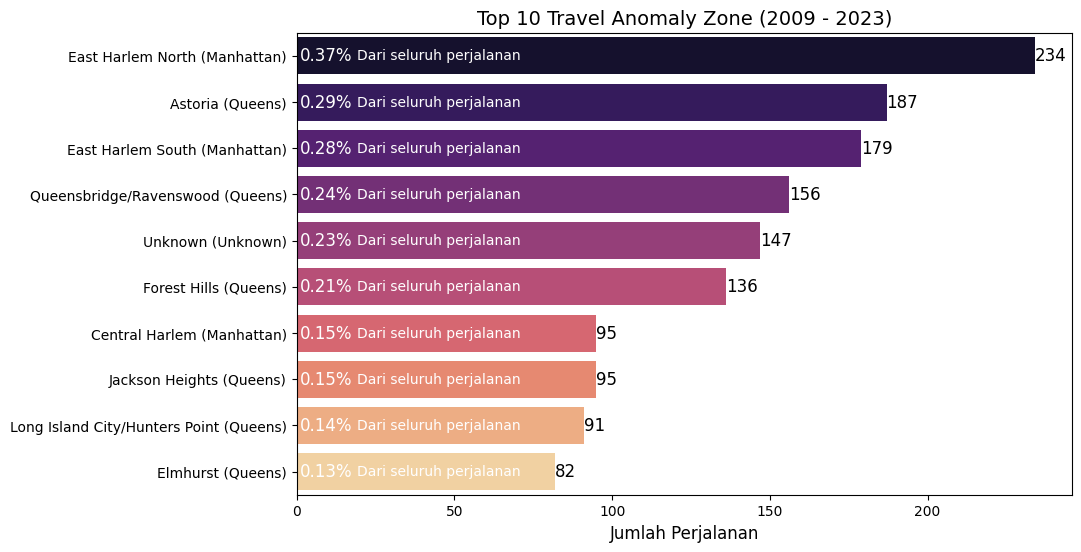

In [47]:
df_anomaly_zones["Zone (Borough)"] = df_anomaly_zones["Pickup Zone"].astype(str) + " (" + df_anomaly_zones["Pickup Borough"] + ")"

# Membuat visualisasi
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_anomaly_zones["count"], y=df_anomaly_zones["Zone (Borough)"], hue=df_anomaly_zones["Zone (Borough)"], palette="magma", legend=False)

# Menambahkan label perjalanan
for index, value in enumerate(df_anomaly_zones["count"]):
    plt.text(value, index, str(value), color="black", va="center", fontsize=12)

# Menambahkan label persentase
for index, value in enumerate(df_anomaly_zones["persentase"]):
    plt.text(1, index, f"{value:.2f}%", color="white", va="center", fontsize=12)

# Menambahkan label persentase
for index, value in enumerate(df_anomaly_zones["persentase"]):
    plt.text(19, index, "Dari seluruh perjalanan", color="white", va="center", fontsize=10)

# Menambahkan judul dan label
plt.title("Top 10 Travel Anomaly Zone (2009 - 2023)", fontsize=14)
plt.xlabel("Jumlah Perjalanan", fontsize=12)
plt.ylabel("")

# Menampilkan plot
plt.show()

Insight Perjalanan Mencurigakan per Zona (2009 - 2023):

**1. Dominasi Area Manhattan dan Queens**
- **5 dari 10 zona** dengan perjalanan mencurigakan tertinggi berada di **Queens**, dan **3 zona** di **Manhattan**.  
- Ini mencerminkan bahwa dua borough ini menjadi pusat aktivitas perjalanan mencurigakan, kemungkinan karena:
  - **Queens**: Banyaknya titik transit utama seperti bandara dan area komersial.  
  - **Manhattan**: Pusat bisnis dengan arus taksi yang padat, berpotensi meningkatkan peluang anomali.  

**2. Zona dengan Anomali Tertinggi**
- **East Harlem North (Manhattan)** mencatat jumlah tertinggi dengan **234 perjalanan mencurigakan** (0.37% dari total perjalanan).  
- Ini menandakan area tersebut memiliki aktivitas transportasi yang berisiko lebih tinggi, mungkin terkait dengan:
  - **Arus penumpang yang tinggi**.  
  - **Potensi manipulasi tarif** karena wilayah ini berbatasan dengan Bronx.  

**3. Queens sebagai Hotspot Perjalanan Mencurigakan**
- Zona seperti:
  - **Astoria** (187 kasus)  
  - **Queensbridge/Ravenswood** (156 kasus)  
  - **Forest Hills** (136 kasus)  
- Zona-zona ini menunjukkan tren mencurigakan yang signifikan.  
- Queens berisi banyak area perumahan dan bisnis yang saling berdekatan, sehingga peluang manipulasi perjalanan bisa lebih tinggi.  

**4. Zona *Unknown* dengan Kasus Tinggi**
- Zona ini mencatat **147 kasus** dan berpotensi menandakan:
  - **Data yang tidak lengkap** akibat kesalahan GPS atau input manual yang tidak valid.  
  - **Database NYC TLC Taxi Zone** memang mencatat LocationID = 264 sebagai wilayah yang tidak dikenal atau *Unknown*.  

**5. Perjalanan Anomali dengan Kasus Lebih Rendah**
- **Staten Island** dan **EWR (Newark Airport)** tidak termasuk dalam daftar ini, mencerminkan:
  - Aktivitas transportasi yang lebih stabil atau terkendali.  


## Anomaly Travel Time Pattern 

Setelah kita mengetahui zona mana yang menjadi daerah yang sering terjadinya perjalanan mencurigakan, selanjutnya kita akan menganalisis pola frekuensi terjadinya perjalanan mencurigakan terseut berdasarkan jam dan hari.

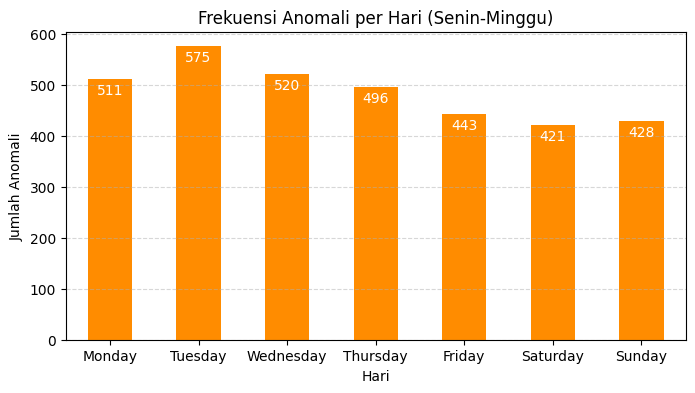

In [48]:
daily_anomalies_weekday = df.groupby("day_of_week")["Anomaly Travel"].sum()

# Urutkan sesuai urutan hari dalam seminggu
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_anomalies_weekday = daily_anomalies_weekday.reindex(order)

# Grafik per hari (Senin-Minggu) dengan label horizontal
plt.figure(figsize=(8, 4))
bars = daily_anomalies_weekday.plot(kind='bar', color='darkorange')
plt.title('Frekuensi Anomali per Hari (Senin-Minggu)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Anomali')
plt.xticks(rotation=0)  # Label horizontal

# Tambahkan label pada setiap bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # Posisi X (tengah batang)
            bar.get_height() - 30,               # Posisi Y (sedikit di atas batang)
            int(bar.get_height()),               # Nilai label
            ha='center',color="white"  )         # Rata tengah
    
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**1. Pola Anomali Tertinggi**
* Selasa (575 anomali) memiliki jumlah anomali tertinggi.
    * Hal ini dapat mengindikasikan lonjakan aktivitas di hari kedua kerja, di mana banyak kegiatan bisnis, pengiriman barang, dan aktivitas transportasi mencapai puncaknya.
* Senin (511 anomali) dan Rabu (520 anomali) juga menunjukkan angka yang tinggi, mendukung pola padat aktivitas di awal pekan.

**2. Pola Anomali Menurun**
* Kamis (496 anomali) dan Jumat (443 anomali) menunjukkan penurunan bertahap, yang bisa mencerminkan:
    * Penurunan intensitas kerja menjelang akhir pekan.
    * Aktivitas perjalanan lebih terjadwal dan terprediksi dibanding awal pekan.

**3. Pola Akhir Pekan**
* Sabtu (421 anomali) dan Minggu (428 anomali) mencatat jumlah anomali terendah, namun masih cukup signifikan.
    * Ini bisa dikaitkan dengan peningkatan aktivitas rekreasi, acara sosial, atau perjalanan wisata.

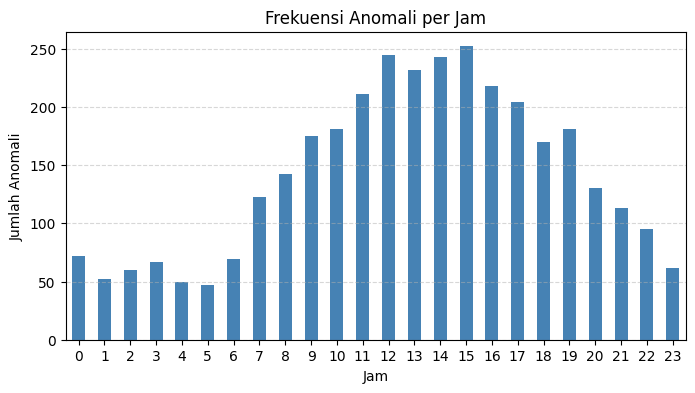

In [49]:
hourly_anomalies = df.groupby("hour")["Anomaly Travel"].sum()

# Grafik per jam dengan label horizontal
plt.figure(figsize=(8, 4))
hourly_anomalies.plot(kind='bar', color='steelblue')
plt.title('Frekuensi Anomali per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Anomali')
plt.xticks(rotation=0)  # Label horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**1. Pola Waktu dengan Anomali Tinggi**
*  Puncak Tertinggi (11:00 - 15:00):
    * Anomali mencapai titik tertinggi pada periode ini. Ini bisa disebabkan oleh:
        - Aktivitas siang hari yang padat seperti jam makan siang atau perjalanan bisnis.
        - Volume kendaraan yang meningkat, khususnya kendaraan logistik dan layanan antar.

    * Penurunan Setelah Jam 15:00:
        - Setelah pukul 15:00, jumlah anomali mulai menurun, kemungkinan karena perjalanan mulai stabil saat transisi dari jam sibuk siang ke sore.

**2. Pola Waktu dengan Anomali Rendah**
* Dini Hari (00:00 - 05:00):
    * Anomali relatif rendah, namun tidak nol. Ini bisa dikaitkan dengan:
        - Aktivitas malam seperti layanan taksi untuk pelanggan klub malam atau pekerja shift malam.
        - Potensi risiko dari pengemudi yang mengantuk atau kecepatan berlebih saat jalanan sepi.
* Subuh (05:00 - 06:00):
    * Penurunan drastis pada waktu ini mungkin menandakan periode transisi saat lalu lintas masih sangat minim.

**3. Pola Kritis (Pagi dan Sore)**
* Pagi (07:00 - 09:00): Lonjakan anomali menandakan periode jam sibuk saat orang berangkat kerja atau sekolah.
* Sore (16:00 - 18:00): Penurunan bertahap setelah puncak siang, mencerminkan arus perjalanan pulang kantor.

## Comparison of the Number of Anomalies between Weekdays and Weekends

Analisis ini bertujuan untuk menguji apakah terdapat perbedaan signifikan dalam jumlah anomali perjalanan taksi antara hari kerja (Senin–Jumat) dan akhir pekan (Sabtu–Minggu) di New York City. Dengan hipotesis sebagai:
* **Hipotesis Nol (H0)**: Tidak ada perbedaan signifikan dalam jumlah anomali perjalanan antara hari kerja dan akhir pekan.
* **Hipotesis Alternatif (H1)**: Ada perbedaan signifikan dalam jumlah anomali perjalanan antara hari kerja dan akhir pekan.

Kita akan membaca dataset dan mengelompokkan data ke dalam dua kategori:
1. Hari kerja (Weekday): Senin – Jumat
1. Akhir pekan (Weekend): Sabtu – Minggu

In [50]:
# Menentukan hari kerja dan akhir pekan
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
weekend = ["Saturday", "Sunday"]

# Menambahkan kolom kategori hari (Weekday vs Weekend)
df["Day Category"] = df["day_of_week"].apply(lambda x: "Weekday" if x in weekday else "Weekend")

# Menghitung jumlah anomali untuk hari kerja dan akhir pekan
weekday_anomalies = df[df["Day Category"] == "Weekday"].groupby("day_of_week")["Anomaly Travel"].sum()
weekend_anomalies = df[df["Day Category"] == "Weekend"].groupby("day_of_week")["Anomaly Travel"].sum()

# Menampilkan jumlah anomali berdasarkan kategori
print(f"""Hasil perhitungan data:
- Hari kerja: {weekday_anomalies.sum()} anomali
- Akhir pekan: {weekend_anomalies.sum()} anomali

Dari sini terlihat bahwa jumlah anomali lebih tinggi pada hari kerja, tetapi kita perlu melakukan uji statistik untuk memastikan apakah perbedaan ini signifikan.""")

Hasil perhitungan data:
- Hari kerja: 2545 anomali
- Akhir pekan: 849 anomali

Dari sini terlihat bahwa jumlah anomali lebih tinggi pada hari kerja, tetapi kita perlu melakukan uji statistik untuk memastikan apakah perbedaan ini signifikan.


**Uji Normalitas Data** <br>
Sebelum memilih metode uji statistik yang tepat, kita harus menentukan apakah data berdistribusi normal atau tidak. <br>

Metode yang Digunakan: <br>
* Kolmogorov-Smirnov (KS Test) → Menguji apakah data mengikuti distribusi normal. Uji normalitas lain seperti Shapiro-Wilk memerlukan minimal 3 sampel, sehingga tidak bisa diterapkan pada data akhir pekan.

Ketika kita melakukan Kolmogorov-Smirnov (KS Test) untuk uji normalitas, kita membandingkan distribusi data sampel dengan distribusi normal standar (mean = 0, standar deviasi = 1).
Namun, data kita memiliki skala asli yang bisa memiliki mean dan standar deviasi yang berbeda. Oleh karena itu, standarisasi diperlukan agar data berada dalam bentuk yang dapat dibandingkan langsung dengan distribusi normal standar.

**Alasan Standarisasi dalam KS Test** <br>
1. KS Test membandingkan dengan distribusi normal standar
    * KS Test secara default membandingkan data dengan distribusi normal standar (mean=0, std=1).
    * Jika data asli memiliki skala yang berbeda, maka hasil KS Test bisa menjadi bias.
1. Menghilangkan efek skala data asli
    * Jika dataset memiliki mean dan standar deviasi yang jauh berbeda dari distribusi normal standar, hasil KS Test bisa salah menolak atau gagal menolak normalitas.
1. Memastikan perbandingan yang adil
    * Dengan menstandarisasi data, kita dapat memastikan bahwa kita benar-benar menguji bentuk distribusi (bukan skala data).

In [51]:
# Standarisasi data untuk Uji Kolmogorov-Smirnov
# Tanpa standarisasi, hasil KS Test bisa tidak akurat karena pengaruh skala data asli.
weekday_standardized = (weekday_anomalies - weekday_anomalies.mean()) / weekday_anomalies.std()
weekend_standardized = (weekend_anomalies - weekend_anomalies.mean()) / weekend_anomalies.std()

# Uji Kolmogorov-Smirnov
ks_weekday_stat, ks_weekday_pval = stats.kstest(weekday_standardized, 'norm')
ks_weekend_stat, ks_weekend_pval = stats.kstest(weekend_standardized, 'norm')

# Menampilkan hasil
if ks_weekday_pval > 0.05:
    print(f"Hari Kerja (Weekday): {ks_weekday_pval} (> 0.05) → Data berdistribusi normal")
else:
    print(f"Hari Kerja (Weekday): {ks_weekday_pval} (<= 0.05) → Data tidak berdistribusi normal")

if ks_weekend_pval > 0.05:
    print(f"Akhir Pekan (Weekend): {ks_weekend_pval} (> 0.05) → Data berdistribusi normal")
else:
    print(f"Akhir Pekan (Weekend): {ks_weekend_pval} (<= 0.05) → Data tidak berdistribusi normal")

Hari Kerja (Weekday): 0.9476545859528172 (> 0.05) → Data berdistribusi normal
Akhir Pekan (Weekend): 0.9991595100193003 (> 0.05) → Data berdistribusi normal


Setelah kita mengetahui bahwa data anomali perjalanan pada hari kerja dan akhir pekan berdistribusi normal (berdasarkan Uji Kolmogorov-Smirnov), langkah selanjutnya adalah memilih uji statistik yang tepat. Hari kerja dan akhir pekan dianggap sebagai dua kelompok yang tidak berhubungan (independen) karena tidak ada hubungan langsung antar data dalam masing-masing kelompok.
* Kelompok 1: Jumlah anomali pada hari kerja (Senin – Jumat)
* Kelompok 2: Jumlah anomali pada akhir pekan (Sabtu – Minggu)

**Pengujian Homogenitas Varians (Levene’s Test)** <br>
Sebelum menjalankan Uji-T, kita perlu mengecek apakah kedua kelompok memiliki varians yang sama (homogenitas varians) menggunakan Levene’s Test.

In [52]:
# Uji Levene untuk memeriksa homogenitas varians
levene_stat, p_value_levene = levene(weekday_anomalies, weekend_anomalies)

# Menampilkan hasil
levene_stat, p_value_levene

if p_value_levene > 0.05:
    print(f"Varians homogen: {p_value_levene} (> 0.05) → Gunakan Uji-T dengan asumsi varians sama (equal variance assumed).")
else:
    print(f"Varians tidak homogen: {p_value_levene} (<= 0.05) → Gunakan Uji-T Welch (equal variance not assumed).")


Varians homogen: 0.30292073327582386 (> 0.05) → Gunakan Uji-T dengan asumsi varians sama (equal variance assumed).


In [53]:
# Melakukan Uji-T Dua Sampel Independen (Welch jika varians tidak homogen)
t_stat, p_value_ttest = ttest_ind(weekday_anomalies, weekend_anomalies, equal_var=True)

# Menampilkan hasil
if p_value_ttest < 0.05:
    print(f"kita menolak H0 : {p_value_ttest} (< 0.05) → Terdapat perbedaan signifikan dalam rata-rata jumlah anomali antara hari kerja dan akhir pekan.")
else:
    print(f"Gagal menolak H0: {p_value_ttest} (>= 0.05) → Tidak ada perbedaan rata-rata jumlah anomali antara hari kerja dan akhir pekan.")


Gagal menolak H0: 0.06343990124918648 (>= 0.05) → Tidak ada perbedaan rata-rata jumlah anomali antara hari kerja dan akhir pekan.


Insight :
* Anomali terjadi secara merata sepanjang minggu, tanpa perbedaan signifikan antara hari kerja dan akhir pekan.
* Kemungkinan besar penyebab anomali tidak berkaitan langsung dengan aktivitas bisnis atau pola kerja masyarakat, maka strategi pengawasan harus diterapkan secara konsisten sepanjang minggu.

# Summary

**1. Permintaan Taksi**
* Manhattan menjadi pusat aktivitas taksi tertinggi dengan 37.474 perjalanan, jauh melampaui borough lainnya. Hal ini wajar karena Manhattan adalah pusat bisnis, pariwisata, dan hiburan di NYC. Aktivitas tinggi ini juga didorong oleh keberadaan destinasi populer seperti Times Square, Wall Street, dan berbagai pusat perkantoran.
* Queens menempati posisi kedua dengan 17.261 perjalanan, yang kemungkinan besar dipengaruhi oleh kedekatannya dengan dua bandara utama, yakni JFK dan LaGuardia. Ini menandakan Queens sebagai wilayah transit utama bagi pendatang dan pelancong.
* Brooklyn memiliki 8.014 perjalanan, mencerminkan aktivitas yang cukup stabil, meski tidak setinggi Manhattan atau Queens.
* Bronx, Staten Island, dan wilayah dengan label "Unknown" memiliki jumlah perjalanan yang jauh lebih sedikit. Aktivitas terbatas ini mencerminkan karakteristik wilayah yang lebih bersifat residensial atau kurang padat.
* EWR (Newark Airport) mencatat hanya 1 perjalanan, menunjukkan minimnya aktivitas taksi yang berhubungan dengan bandara tersebut, kemungkinan karena penumpang lebih memilih moda transportasi lain seperti kereta atau layanan rideshare.

**2. Zona dengan Anomali Tinggi**
* Borough Queens mencatat jumlah perjalanan mencurigakan tertinggi senilai 1317, meskipun total perjalanan lebih rendah dari Manhattan.
* East Harlem North (Manhattan) mencatat jumlah anomali tertinggi dalam kategori zone dengan 234 kasus (0,37% dari seluruh perjalanan). Sebagai wilayah dengan aktivitas sosial yang beragam, East Harlem North berpotensi memiliki risiko lebih tinggi terkait aktivitas mencurigakan.
* Astoria (Queens) berada di posisi kedua dengan 187 kasus (0,29%). Astoria merupakan wilayah yang ramai dengan restoran, kafe, dan area komersial, yang mungkin berkontribusi pada lonjakan anomali.

**3. Polanya Berdasarkan Waktu**
* Hari dengan Anomali Tertinggi:
    * Anomali cenderung lebih banyak terjadi pada Selasa (575 kasus), diikuti oleh Rabu (520 kasus) dan Senin (511 kasus). Hal ini kemungkinan besar disebabkan oleh aktivitas yang lebih tinggi pada hari kerja, terutama di awal minggu.
    * Aktivitas anomali menurun secara bertahap dari Kamis hingga Minggu, dengan jumlah terendah pada Sabtu (421 kasus).
    * Pola ini menyoroti bahwa potensi aktivitas mencurigakan lebih berhubungan dengan hari kerja daripada akhir pekan.

* Waktu dengan Anomali Tertinggi:
    * Anomali mencapai puncaknya pada pukul 14:00 - 15:00 dan tetap tinggi sepanjang pukul 11:00 - 16:00. Periode ini bertepatan dengan jam makan siang dan transisi shift kerja, yang mungkin meningkatkan potensi perilaku mencurigakan di tengah lonjakan aktivitas.
    * Anomali cenderung menurun secara signifikan setelah pukul 20:00, mencerminkan berkurangnya mobilitas warga pada malam hari.
    * Dini hari (pukul 00:00 - 06:00) mencatat jumlah anomali terendah, menandakan minimnya aktivitas taksi pada periode ini.

# Recommendation

**1. Optimalisasi Penempatan Taksi**
* **Penyesuaian Armada di Manhattan:** <br>
Dengan jumlah perjalanan tertinggi, Manhattan memerlukan distribusi armada yang optimal, terutama di kawasan padat seperti Times Square, Wall Street, dan pusat bisnis lainnya. Ini merupakan sebuah peluang untuk dapat mempertimbangkan penempatan kendaraan tambahan selama jam sibuk (11:00 - 16:00).
* **Optimalisasi Layanan di Queens** <br>
Karena tingginya jumlah perjalanan terkait bandara di Queens, kerja sama dengan pihak bandara untuk menyediakan jalur taksi khusus atau pos taksi di lokasi strategis dapat meningkatkan layanan.
* **Strategi Promosi di Brooklyn dan Area Sepi** <br>
Untuk meningkatkan permintaan di Brooklyn dan area dengan aktivitas lebih rendah, mungkin dapat mengadakan penawaran diskon, layanan antar-jemput berbasis reservasi, atau kerja sama dengan layanan pariwisata.
* **Peninjauan Layanan ke EWR (Newark Airport)** <br>
Dengan minimnya aktivitas taksi ke EWR, disarankan untuk mengevaluasi tarif, rute, dan promosi khusus untuk menarik penumpang.

**2. Mitigasi Aktivitas Anomali**
* **Deteksi dan Pencegahan Manipulasi Perjalanan** <br>
Mengingat potensi pencatatan perjalanan palsu dan manipulasi data GPS , solusinya:
    - Memperbarui dan maintenance berkala pada perangkat pencatat perjalanan seperti taximeter agar dapat mengurangi kesalahan pencatatan perjalanan dan kesalahan pengiriman data.
    - Memperbarui Perangkat Lunak GPS untuk meningkatkan akurasi dan mendeteksi lokasi yang tidak realistis atau perjalanan yang tidak sesuai pola wajar.
* **Penambahan Pengawasan di Zona Rawan** <br>
Karena East Harlem North (Manhattan) dan Astoria (Queens) mencatat banyak anomali, disarankan untuk:
    - Memasang CCTV dan Sensor Pemantauan di area dengan lonjakan anomali.
    - Membentuk Tim Inspeksi Lapangan untuk mengecek potensi manipulasi data oleh pengemudi.

**3. Edukasi**
* **Sosialisasi kepada Pengemudi tentang Kebijakan dan Etika** <br>
Program ini bertujuan untuk meningkatkan kesadaran pengemudi akan konsekuensi hukum manipulasi data serta pentingnya kejujuran dalam pencatatan perjalanan.
* **Edukasi Penumpang** <br>
Kampanye informasi untuk penumpang agar mereka memahami cara melaporkan jika menemukan perjalanan yang mencurigakan atau tidak sesuai.

In [ ]:
# Save clean data to csv
df.to_csv("../data/Clean NYC TLC.csv", index=False)